In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
# Read in the csv file to a dataframe
df = pd.read_csv('fully_merged_data.csv')

In [3]:
# Drop columns that have barely any data or that may not be needed. (If needed just remove from the drop list)
df = df.drop(['incident_url', 'source_url', 'incident_url_fields_missing', 'gun_stolen', 'gun_type', 'location_description',
              'n_guns_involved', 'notes', 'participant_name', 'participant_relationship', 'sources', 'state_house_district', 'state_senate_district'], axis=1)
#df

In [4]:
# Clean data here (just ideas):
# 1) Replace NaN's in particpant_age with average based off euclidean distance of lat and long and possibly population?
# 2) Then fill in participant_age_group accordingly?
# 3) Replace NaN's in participant_gender with both "unknown" and average of city/county to 
#    get perspective on whether data would be skewed. (Represents challenge for progress report)
# 4) Replace blanks in participant_status with "unknown" (DONE)
# 5) Replace participant_type with "unknown"? (DONE)

In [5]:
# Exploratory Analysis:

In [6]:
# Visual Analysis:

In [7]:
# 3) Replace NaN's in participant_gender with both "unknown" and average of city/county to 
#    get perspective on whether data would be skewed.

# Uncomment following row for unknown replacement
df['participant_gender'] = df['participant_gender'].replace(np.nan, "unknown")

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'

def createGenderDictionary(df):
    cityGendersDict = {}
    
    # range is 4395 because that is number of rows
    for index in range(len(df)):
        
        # grab the current city/county which will end up being a key
        currentCity = df['city_or_county'][index]
        
        # if the current gender is known we will add this to the gender dictionary
        if(df['participant_gender'][index] != "unknown"):
            
            # if the current city isn't already a key make it one
            if(currentCity not in cityGendersDict):
                cityGendersDict[currentCity] = {"Male": 0, "Female": 0}
            
            # grab each gender for this row
            genders = df['participant_gender'][index].split("||")
            
            # update the current city's number of genders
            for gender in genders:
                if "Male" in gender:
                    cityGendersDict[currentCity]["Male"] += 1
                elif "Female" in gender:
                    cityGendersDict[currentCity]["Female"] += 1
                    
    # now just take the higher gender count (mode) and set that as the city's gender
    for key in cityGendersDict:
        if(cityGendersDict[key]["Male"] > cityGendersDict[key]["Female"]):
            cityGendersDict[key] = "0::Male"
        else:
            cityGendersDict[key] = "0::Female"
    
    return cityGendersDict


cityGendersDict = createGenderDictionary(df)

# loop here is to actually do the replacement into the dataframe
for index in df.index[df['participant_gender'] == "unknown"]:
    currentCity = df['city_or_county'][index]
    if currentCity in cityGendersDict:
        df['participant_gender'][index] = cityGendersDict[currentCity]
    

In [9]:
##replace participant status and type NaNs with unknown
pd.options.display.max_columns = None
df['participant_status'] = df['participant_status'].fillna("Unknown")
df['participant_type'] = df['participant_type'].fillna("Unknown")
df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_status,participant_type,Unnamed: 0.1,geocode,population,poverty rate,income,age,property value,employees,wage
0,0,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,2.0,Shots Fired - No Injuries,43.2301,-86.2514,0::21||0::23,0::Adult 18+,0::Female,0::Unharmed,0::Victim,1050.0,05000US26121,172148.0,165197.0,43920.0,39.0,101400.0,74691.0,34640.6
1,1,92307,2014-01-01,Wisconsin,Milwaukee,4700 block of N. 50th St,0,1,4.0,Shot - Wounded/Injured,43.1027,-87.9752,0::28,0::Adult 18+,0::Male,0::Injured,0::Victim,2122.0,05000US55079,951448.0,930552.0,47607.0,34.7,151700.0,2835644.0,45566.0
2,2,92519,2014-01-01,Tennessee,Humboldt,NaN,0,0,8.0,Shots Fired - No Injuries,35.8255,-88.9093,0::26,0::Adult 18+,0::Male,0::Unharmed,0::Subject-Suspect,NaN,NaN,652752.0,636034.0,38826.0,33.8,96800.0,2860897.0,43781.4
3,3,95244,2014-01-01,Virginia,Chesapeake,405 Shell Rd,0,0,4.0,Shots Fired - No Injuries,36.7515,-76.3443,0::21,NaN,0::Male,Unknown,0::Victim,1999.0,05000US51550,233194.0,225837.0,69978.0,36.7,256500.0,4060169.0,56474.4
4,4,92251,2014-01-01,Ohio,Cleveland,12108 Marne Av,0,1,9.0,Shot - Wounded/Injured,41.4515,-81.7724,0::50,0::Adult 18+||1::Adult 18+,0::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,1485.0,06000US3903516000,145574.0,141161.0,54504.0,41.3,146400.0,72743.0,45369.7
5,5,217091,2014-01-01,Arizona,Phoenix,3400 E Sky Harbor Blvd,0,0,7.0,TSA Action,33.4347,-112.0060,0::25,NaN,0::Male,Unknown,Unknown,68.0,16000US0455000,1615041.0,1595700.0,52062.0,33.4,213300.0,2854089.0,46143.6
6,6,92512,2014-01-01,Florida,Riviera Beach,1141 West 31st Street,1,1,20.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",26.7875,-80.0714,0::27||1::29||2::25,0::Adult 18+||1::Adult 18+||2::Adult 18+,0::Male||1::Female||2::Male,0::Killed||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,NaN,NaN,132378.0,131231.0,46672.0,39.9,225400.0,8756756.0,44699.1
7,7,95236,2014-01-01,Texas,San Antonio,9200 block of West Alametos,0,1,20.0,Shot - Wounded/Injured,29.4769,-98.5130,0::9,0::Child 0-11,0::Female,0::Injured,0::Victim,1921.0,16000US4865000,1492494.0,1469160.0,49268.0,33.5,133900.0,12204129.0,49308.7
8,8,92248,2014-01-01,Virginia,Russell County,Gravel Lick,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",36.9303,-82.2722,0::22||0::23,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,165411,2014-01-01,Texas,Corpus Christi,4600 block of Valdez,0,1,27.0,Shot - Wounded/Injured||Domestic Violence,27.7515,-97.4432,0::42||1::27,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,1824.0,16000US4817000,325734.0,316503.0,54344.0,35.1,132400.0,12204129.0,49308.7


In [10]:
#BEGIN ANALYSIS ON AGE, GENDER, RACE, LOCATION

#create a function that finds the mode of a given column(s), and if multiple columns are given, it will 
#also return the list of most common values among the columns. This function may still need some work for the grouping to be understandable

def calculateModes(df, columnList):
    
    #calculate mode of each column
    for column in columnList:
        print("The mode is for ", column, " is ", df[column].mode())

        
    #calculate most common grouping among columns
    print(columnList)
    output = df.groupby(columnList).mean()
    print(output)
    
#df.groupby('participant_gender').groups

In [11]:
#function test with age and gender, we may or may not use this data depending on what we can do with it
calculateModes(df, ['participant_age', 'participant_gender'])

The mode is for  participant_age  is  0    0::19
dtype: object
The mode is for  participant_gender  is  0    0::Male
dtype: object
['participant_age', 'participant_gender']
                                                                                                          Unnamed: 0  \
participant_age                                    participant_gender                                                  
0:1                                                0:Male                                               42059.000000   
0:10                                               0:Male|1:Female                                      44003.000000   
                                                   1:Male|2:Male                                        43498.000000   
0:11                                               0:Male                                               44931.000000   
0:11|1:12                                          0::Male                                              430

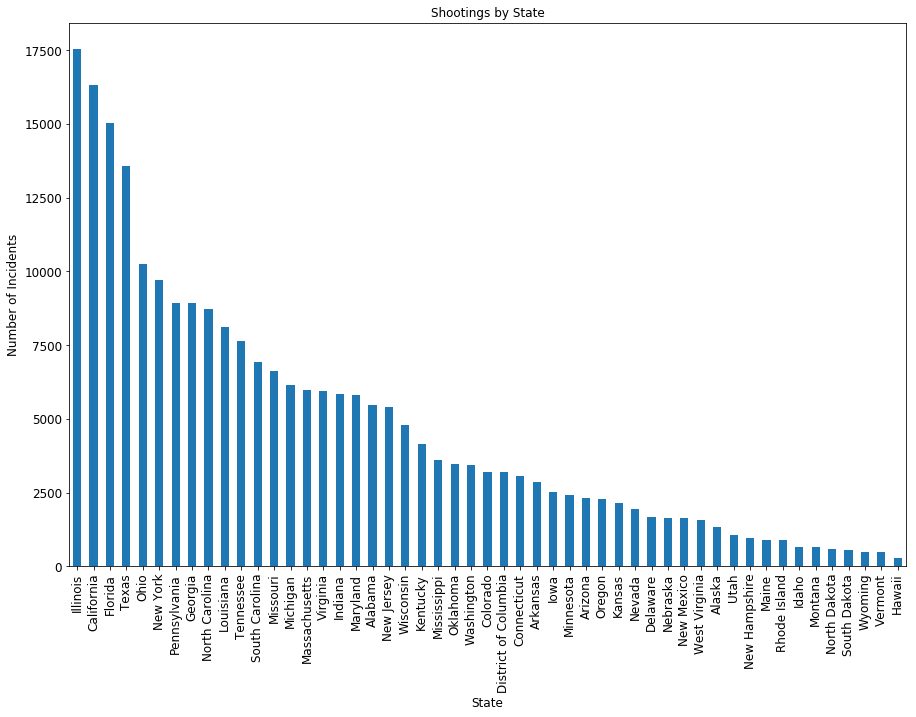

In [12]:
#Try graphing some of the data- state
import matplotlib.pyplot as plt
ax = df['state'].value_counts().plot(kind='bar', title ="Shootings by State", figsize=(15, 10),
                                     legend=False, fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Number of Incidents", fontsize=12)
plt.show()

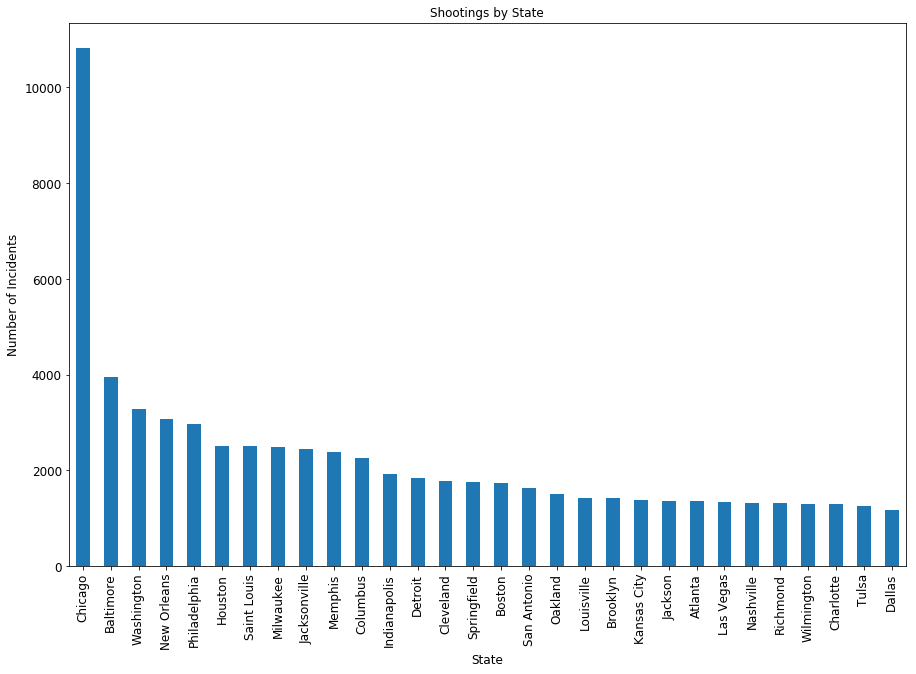

In [13]:
ax2 = df['city_or_county'].value_counts().nlargest(30).plot(kind='bar', title ="Shootings by State", figsize=(15, 10), legend=False, fontsize=12)
ax2.set_xlabel("State", fontsize=12)
ax2.set_ylabel("Number of Incidents", fontsize=12)
plt.show()

In [14]:
import re

# Dictionary for each gender and type
gender_type_dict = {"Male-Suspect": 0, "Male-Victim": 0, "Female-Suspect": 0, "Female-Victim": 0}

for i in range(0, len(df), 1):
    # Create lists for genders and types
    genderList = re.split("\d*[:|]\s*", df['participant_gender'][i])
    typeList = re.split("\d*[:|]", df['participant_type'][i])
    
    # Remove empty spaces from lists
    genderList = list(filter(lambda x: x != '', genderList))
    typeList = list(filter(lambda x: x != '', typeList))

    # Get total number of incidents for each gender and type
    for j in range(0, max(len(genderList), len(typeList)), 1):
        # If one list is greater than the other, use the first element
        if j >= len(genderList):
            part_gender = genderList[0]
        else:
            part_gender = genderList[j]
        if j >= len(typeList):
            part_type = typeList[0]
        else:
            part_type = typeList[j]
        
        # Skip entries with Unknowns
        if part_gender == "Unknown" or part_type == "Unknown":
            continue
        
        # Increment corresponding gender type in dictionary
        if part_gender == "Male":
            if part_type == "Subject-Suspect":
                gender_type_dict['Male-Suspect'] = gender_type_dict['Male-Suspect'] + 1
            else:
                gender_type_dict['Male-Victim'] = gender_type_dict['Male-Victim'] + 1
        else:
            if part_type == "Subject-Suspect":
                gender_type_dict['Female-Suspect'] = gender_type_dict['Female-Suspect'] + 1
            else:
                gender_type_dict['Female-Victim'] = gender_type_dict['Female-Victim'] + 1
            
print("Dictionary: ", gender_type_dict)

Dictionary:  {'Male-Suspect': 185568, 'Male-Victim': 160809, 'Female-Suspect': 13695, 'Female-Victim': 32251}


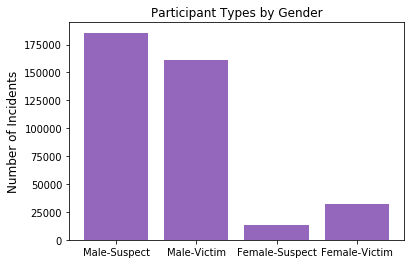

In [34]:
# Graph all gender types and their number of incidents
plt.bar(range(len(gender_type_dict)), list(gender_type_dict.values()), align='center')
plt.xticks(range(len(gender_type_dict)), list(gender_type_dict.keys()))
plt.title("Participant Types by Gender", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)

plt.show()